In [1]:
import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import itertools
from datetime import datetime
#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks
import scikitplot as skplt 
import seaborn as sns

from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split #Data split function
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from collections import Counter
import pydotplus
from IPython.display import Image



In [2]:
data = pd.read_csv('Sales.csv')

In [3]:
data.shape

(113036, 18)

In [4]:
data.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [5]:
data.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [6]:
data.duplicated().values.any()


True

In [7]:
data = data.drop_duplicates()
data.shape

(112036, 18)

In [8]:
data.duplicated().values.any()


False

In [9]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [10]:
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int

Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Profit              1256
Cost                 360
Revenue             1876
dtype: int64

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [12]:
data['Discount']=data['Unit_Price']*data['Order_Quantity']-data['Revenue']
data['Relative_Discount']=data['Discount']/(data['Unit_Price']*data['Order_Quantity'])
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount,Relative_Discount
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,10,0.010417
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,10,0.010417
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,359,0.130072
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,312,0.130000
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,62,0.129167


In [13]:
data['Relative_Profit']=data['Profit']/data['Revenue']
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount,Relative_Discount,Relative_Profit
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,10,0.010417,0.621053
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,10,0.010417,0.621053
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,359,0.130072,0.568930
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,312,0.130000,0.568966
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,62,0.129167,0.569378


<AxesSubplot:>

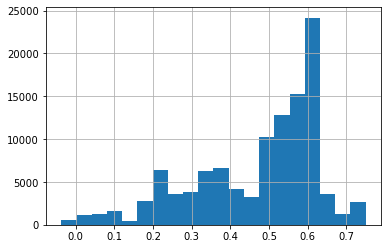

In [14]:
data.Relative_Profit.hist(bins=20)


In [15]:
data['Discount_Y_N'] = (data['Relative_Discount'] != 0)
data['Discount_Y_N'] = data['Discount_Y_N'].astype(int).replace({False: 0, True: 1})
data['Discount_Y_N'].value_counts()

1    105587
0      6449
Name: Discount_Y_N, dtype: int64

In [16]:
data['Discount_Offer'] = (data['Relative_Discount'] >= 0.05)
data['Discount_Offer'] = data['Discount_Offer'].astype(int).replace({False: 0, True: 1})
data['Discount_Offer'].value_counts()

1    59844
0    52192
Name: Discount_Offer, dtype: int64

In [17]:
data['Profit_Good_Bad'] = (data['Relative_Profit'] >= 0.4)
data['Profit_Good_Bad'] = data['Profit_Good_Bad'].astype(int).replace({False: 0, True: 1})
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Unit_Price,Profit,Cost,Revenue,Discount,Relative_Discount,Relative_Profit,Discount_Y_N,Discount_Offer,Profit_Good_Bad
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,120,590,360,950,10,0.010417,0.621053,1,0,1
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,120,590,360,950,10,0.010417,0.621053,1,0,1
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,120,1366,1035,2401,359,0.130072,0.568930,1,1,1
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,120,1188,900,2088,312,0.130000,0.568966,1,1,1
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,120,238,180,418,62,0.129167,0.569378,1,1,1


In [18]:
data['Profit_Good_Bad'].value_counts()

1    77628
0    34408
Name: Profit_Good_Bad, dtype: int64

In [19]:
corr = data.corr()
corr

,Day,Month,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount,Relative_Discount,Relative_Profit,Discount_Y_N,Discount_Offer,Profit_Good_Bad
Day,1.000000,0.014677,-0.007435,-0.015186,-0.002845,0.003520,0.003578,0.004714,0.003493,0.003995,0.003783,0.005379,0.000453,-0.001098,0.002320,0.001223
Month,0.014677,1.000000,-0.315157,-0.051462,0.027609,-0.021231,-0.021270,-0.001969,-0.006663,-0.005187,-0.001828,-0.009768,0.017025,-0.004783,-0.015889,0.018570
Year,-0.007435,-0.315157,1.000000,0.040879,0.124091,-0.217431,-0.213538,-0.181349,-0.215449,-0.208514,-0.166439,-0.018877,0.127608,-0.041275,-0.017087,0.172579
Customer_Age,-0.015186,-0.051462,0.040879,1.000000,0.027376,-0.021401,-0.020301,0.004388,-0.016012,-0.009303,-0.029598,-0.033964,0.030021,0.010818,-0.047528,0.033699
Order_Quantity,-0.002845,0.027609,0.124091,0.027376,1.000000,-0.516289,-0.516387,-0.238770,-0.340386,-0.312880,-0.248579,-0.023360,0.289783,0.155749,-0.036367,0.371351
Unit_Cost,0.003520,-0.021231,-0.217431,-0.021401,-0.516289,1.000000,0.997891,0.740623,0.829557,0.817544,0.638832,0.063771,-0.425559,0.117920,0.065940,-0.558293
Unit_Price,0.003578,-0.021270,-0.213538,-0.020301,-0.516387,0.997891,1.000000,0.749450,0.825965,0.818176,0.639498,0.063469,-0.413173,0.118783,0.064943,-0.540590
Profit,0.004714,-0.001969,-0.181349,0.004388,-0.238770,0.740623,0.749450,1.000000,0.902109,0.956508,0.555901,-0.086966,-0.173899,0.147175,-0.076943,-0.289474
Cost,0.003493,-0.006663,-0.215449,-0.016012,-0.340386,0.829557,0.825965,0.902109,1.000000,0.988748,0.782743,0.057381,-0.402311,0.127238,0.057923,-0.504918
Revenue,0.003995,-0.005187,-0.208514,-0.009303,-0.312880,0.817544,0.818176,0.956508,0.988748,1.000000,0.721859,0.008642,-0.332254,0.137036,0.012483,-0.441683


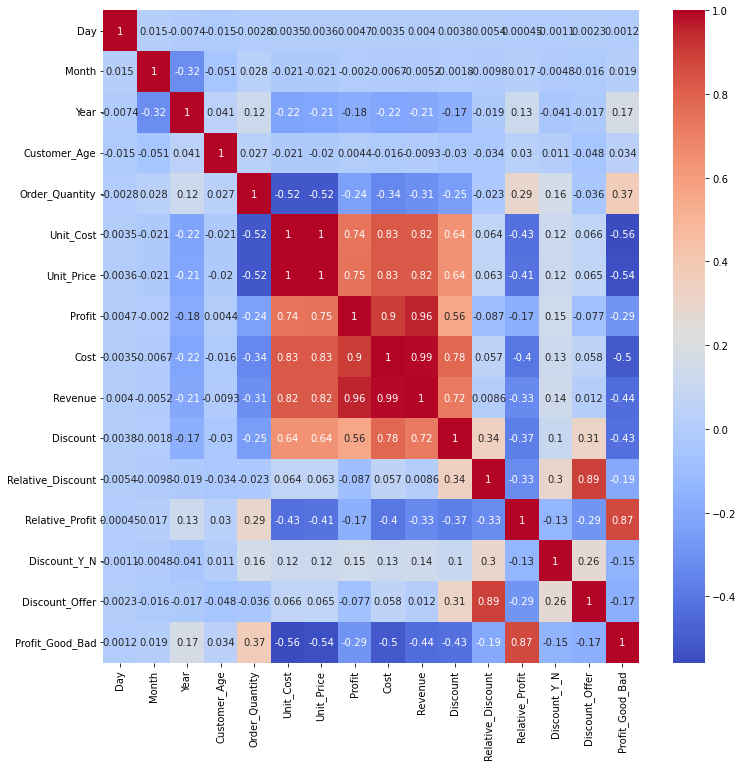

In [20]:
cp = sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.gcf().set_size_inches(12,12)

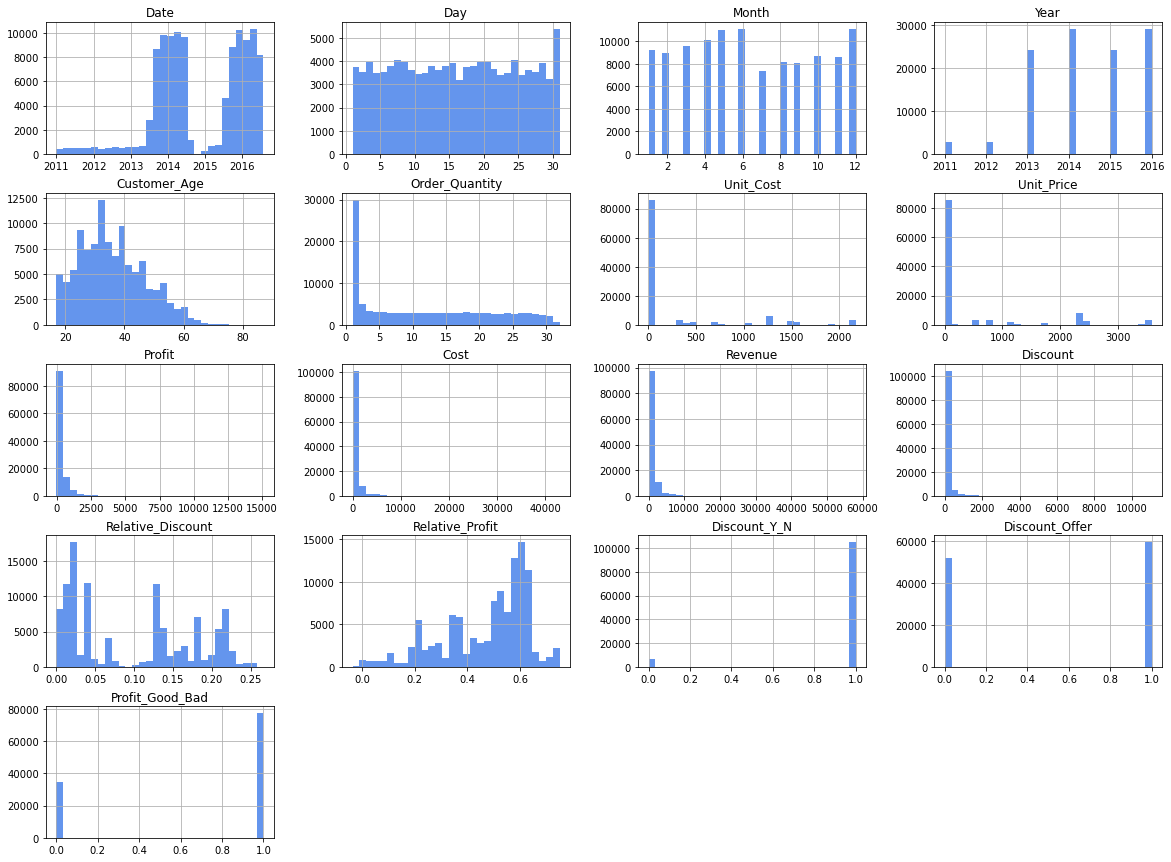

In [21]:
data.hist(bins=30, figsize=(20,15), color='cornflowerblue')
plt.show()

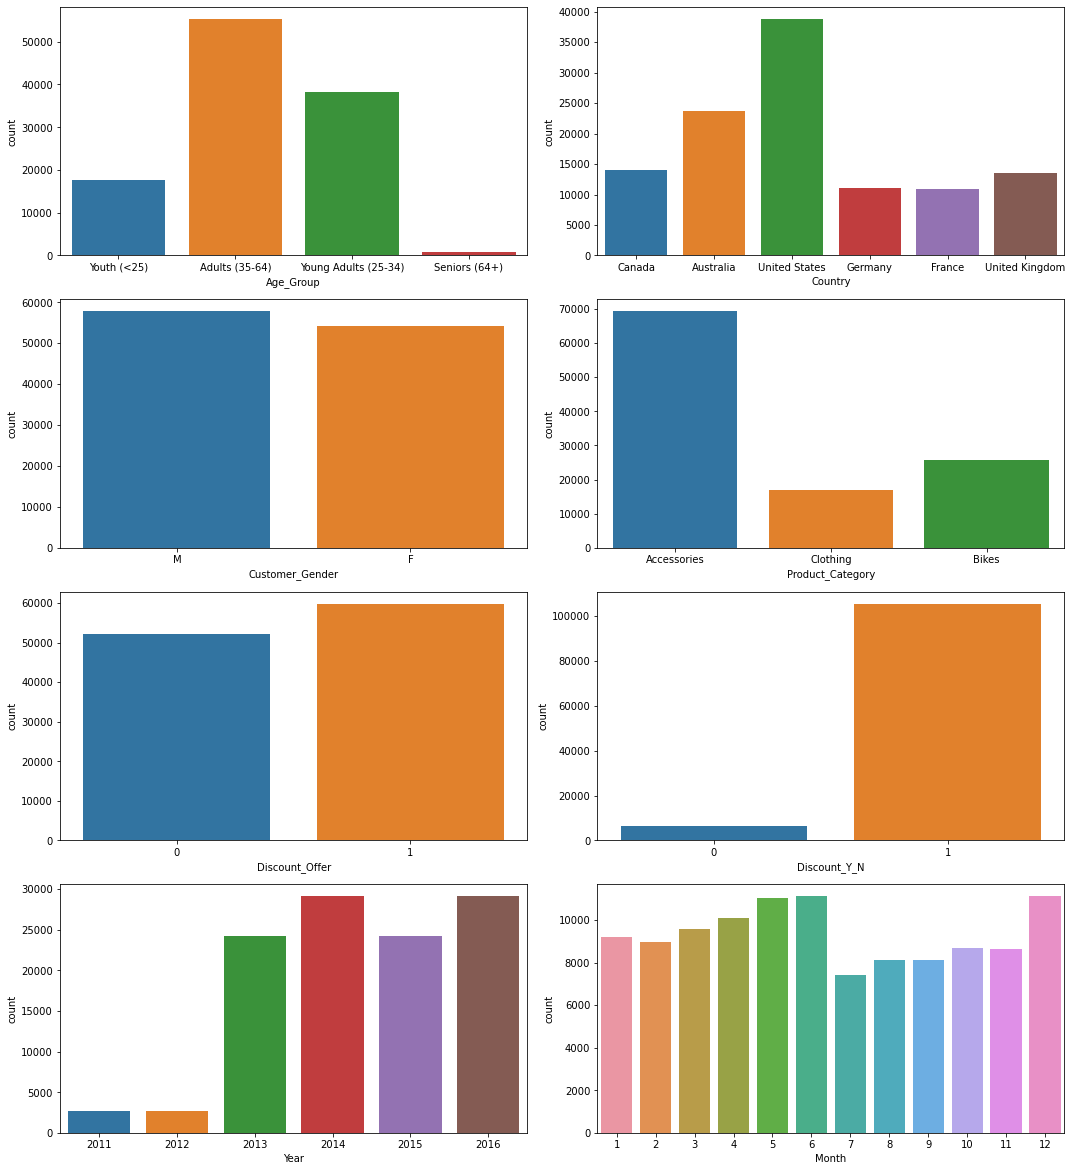

In [22]:
columns = ["Age_Group", "Country", "Customer_Gender",
           "Product_Category", "Discount_Offer", "Discount_Y_N", "Year", "Month" ]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = columns[i],ax=ax, data = data)
    plotnumber += 1
    plt.tight_layout()
plt.show()

### DATA VISUALIZATION ###

#### by year and month

In [23]:
rev_by_year = data.groupby(['Year', 'Product_Category'])['Revenue'].sum().reset_index()
rev_by_year

,Year,Product_Category,Revenue
0,2011,Bikes,8951966
1,2012,Bikes,9133795
2,2013,Accessories,3361765
3,2013,Bikes,9758574
4,2013,Clothing,1996988
5,2014,Accessories,4267159
6,2014,Bikes,7525417
7,2014,Clothing,2247616
8,2015,Accessories,3265581
9,2015,Bikes,14742208


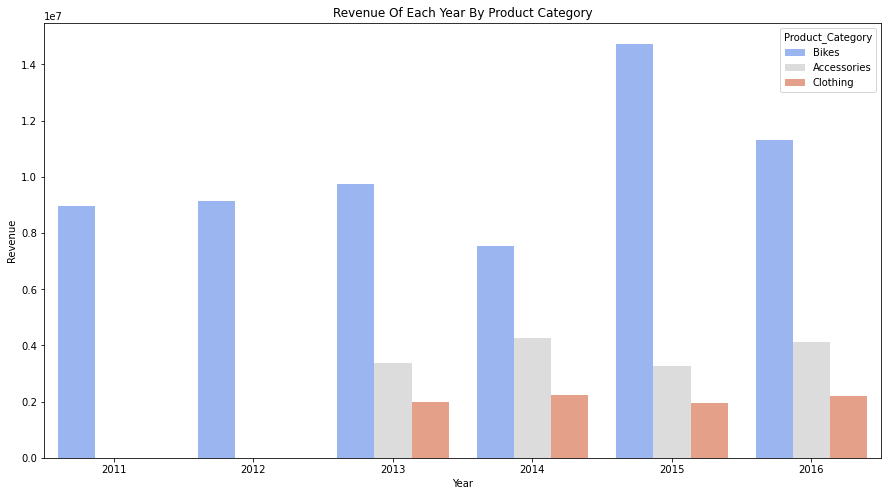

In [24]:
sns.barplot(data = rev_by_year, x='Year', y='Revenue', hue='Product_Category', palette=('coolwarm')).set(title='Revenue Of Each Year By Product Category')
plt.gcf().set_size_inches(15,8)

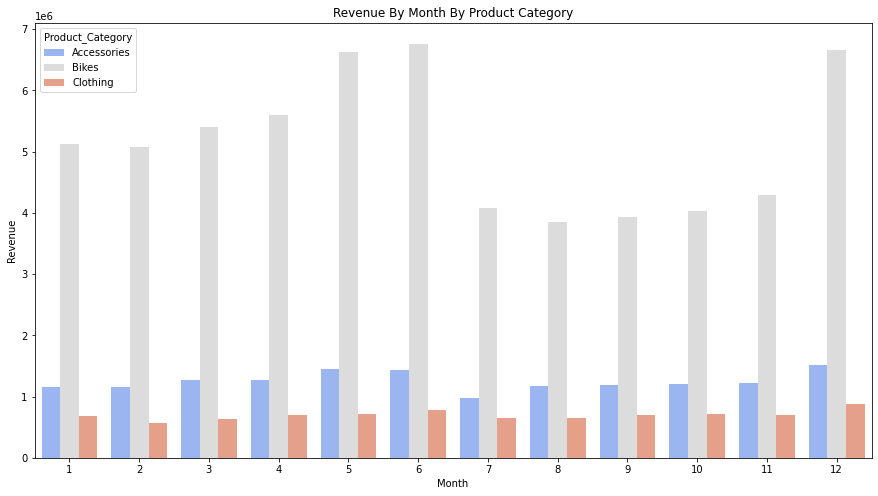

In [25]:
rev_by_month = data.groupby(['Month', 'Product_Category'])['Revenue'].sum().reset_index()
sns.barplot(data = rev_by_month, x='Month', y='Revenue', hue='Product_Category', palette=('coolwarm')).set(title='Revenue By Month By Product Category')
plt.gcf().set_size_inches(15,8)


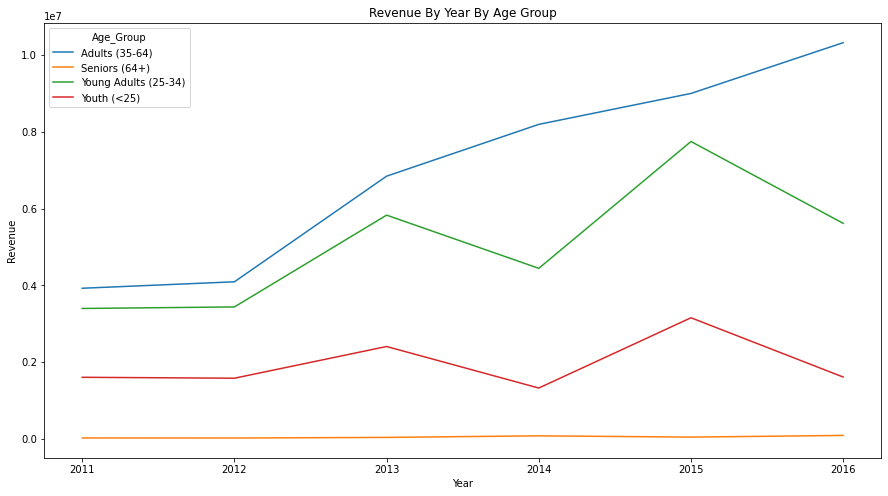

In [26]:
rev_by_year_age = data.groupby(['Year', 'Age_Group'])['Revenue'].sum().reset_index()
sns.lineplot(data = rev_by_year_age, x='Year', y='Revenue', hue='Age_Group').set(title='Revenue By Year By Age Group')
plt.gcf().set_size_inches(15,8)

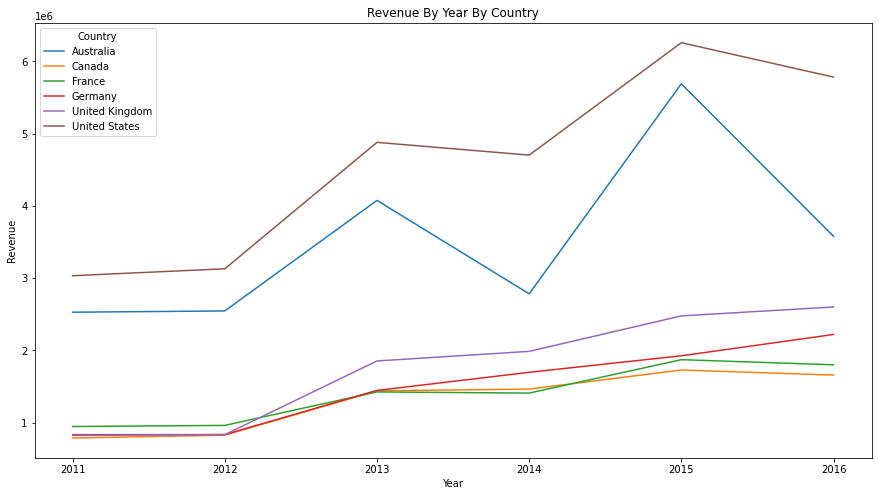

In [27]:
rev_by_year_country = data.groupby(['Year', 'Country'])['Revenue'].sum().reset_index()
sns.lineplot(data = rev_by_year_country, x='Year', y='Revenue', hue='Country').set(title='Revenue By Year By Country')
plt.gcf().set_size_inches(15,8)

#### Revenue by Country

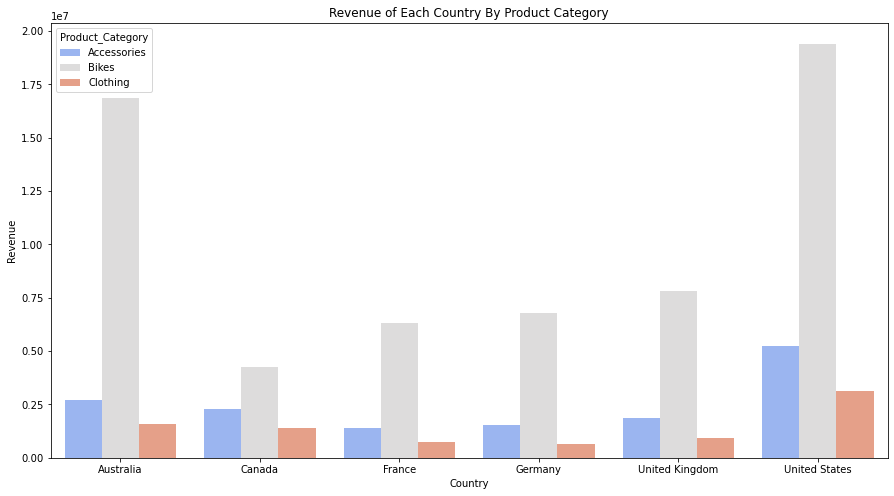

In [28]:
rev_by_country = data.groupby(['Country', 'Product_Category'])['Revenue'].sum().reset_index()
sns.barplot(data = rev_by_country, x='Country',y='Revenue', hue='Product_Category', palette=('coolwarm')).set(title='Revenue of Each Country By Product Category')
plt.gcf().set_size_inches(15,8)

#### by age group

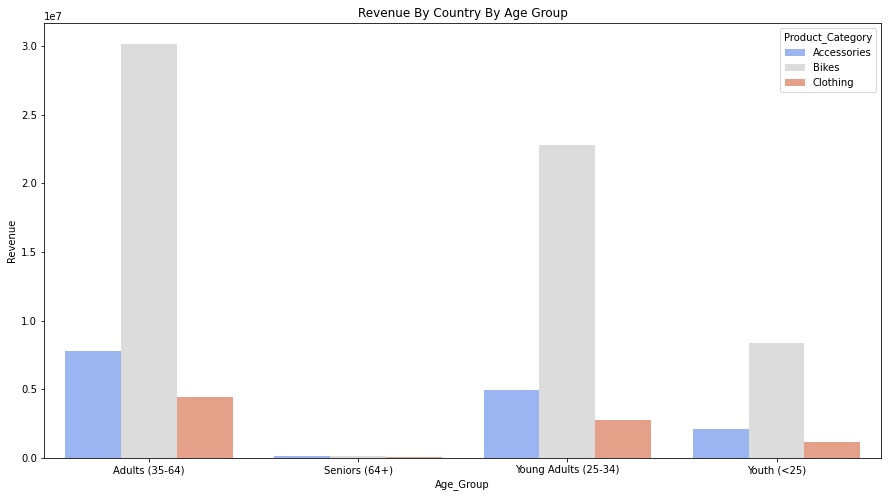

In [29]:
rev_by_country_age = data.groupby(['Age_Group', 'Product_Category'])['Revenue'].sum().reset_index()
sns.barplot(data = rev_by_country_age, x='Age_Group',y='Revenue', hue='Product_Category', palette=('coolwarm')).set(title='Revenue By Country By Age Group')
plt.gcf().set_size_inches(15,8)

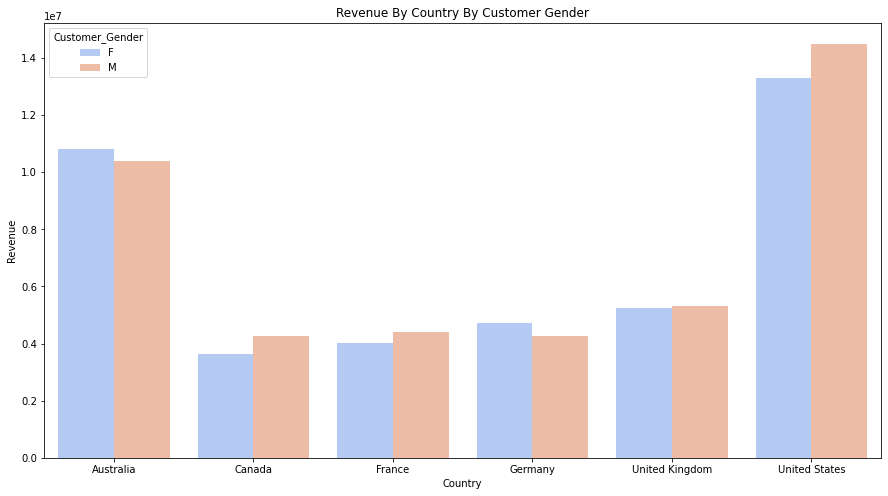

In [30]:
rev_by_country_gender = data.groupby(['Country', 'Customer_Gender'])['Revenue'].sum().reset_index()
sns.barplot(data = rev_by_country_gender, x='Country',y='Revenue', hue='Customer_Gender', palette=('coolwarm')).set(title='Revenue By Country By Customer Gender')
plt.gcf().set_size_inches(15,8)

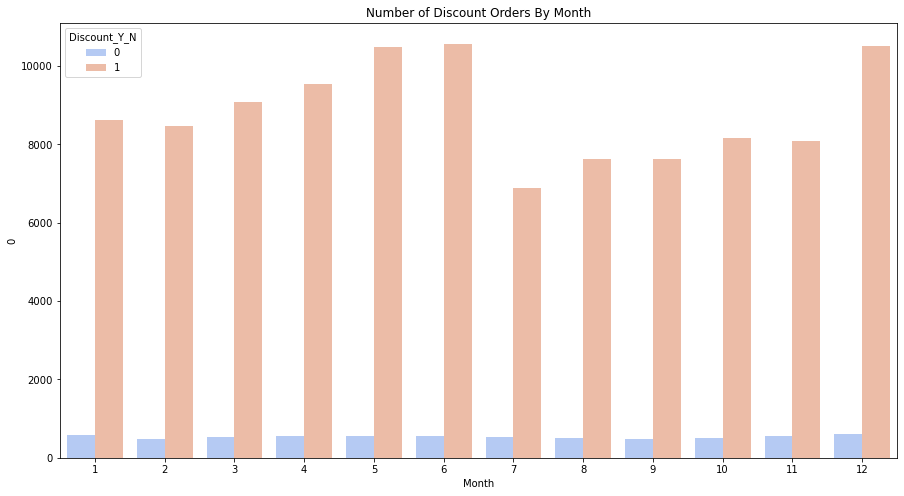

In [31]:
discount_by_month= data.groupby(['Month','Discount_Y_N']).size().reset_index()
sns.barplot(data = discount_by_month, x='Month',y=0, hue='Discount_Y_N', palette=('coolwarm')).set(title='Number of Discount Orders By Month')
plt.gcf().set_size_inches(15,8)

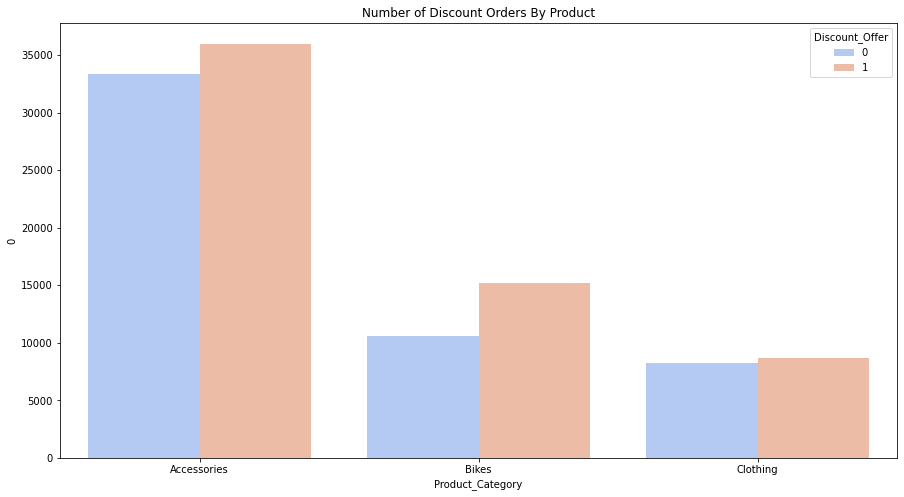

In [32]:
discount_by_product= data.groupby(['Product_Category','Discount_Offer']).size().reset_index()
sns.barplot(data = discount_by_product, x='Product_Category',y=0, hue='Discount_Offer', palette=('coolwarm')).set(title='Number of Discount Orders By Product')
plt.gcf().set_size_inches(15,8)

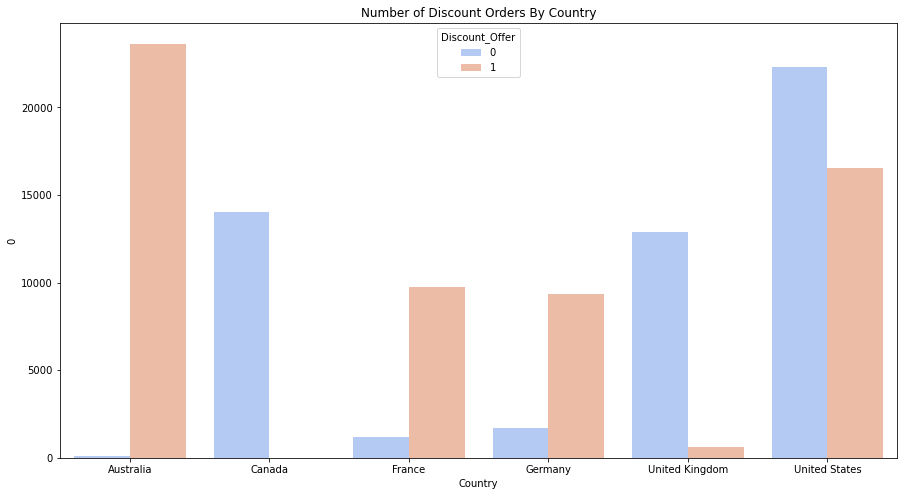

In [33]:
discount_by_country= data.groupby(['Country','Discount_Offer']).size().reset_index()
sns.barplot(data = discount_by_country, x='Country',y=0, hue='Discount_Offer', palette=('coolwarm')).set(title='Number of Discount Orders By Country')
plt.gcf().set_size_inches(15,8)

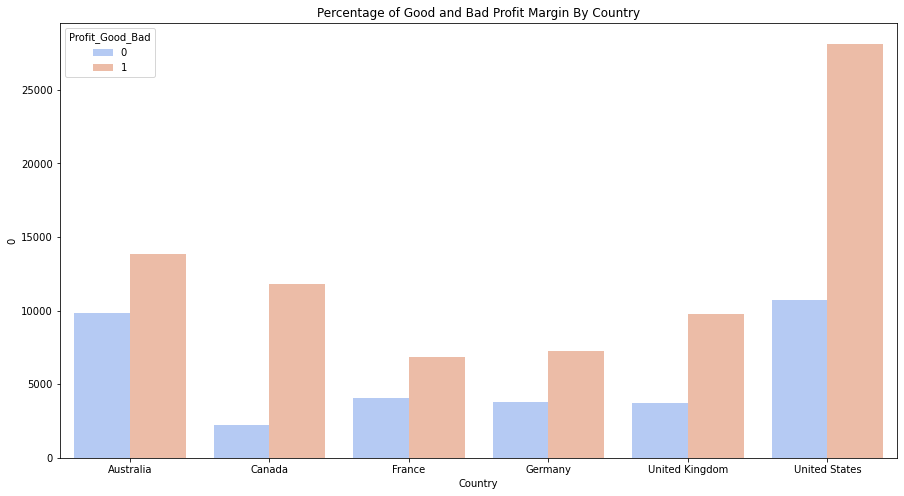

In [34]:
profitmargin_by_country= data.groupby(['Country','Profit_Good_Bad']).size().reset_index()
sns.barplot(data = profitmargin_by_country, x='Country',y=0, hue='Profit_Good_Bad', palette=('coolwarm')).set(title='Percentage of Good and Bad Profit Margin By Country')
plt.gcf().set_size_inches(15,8)

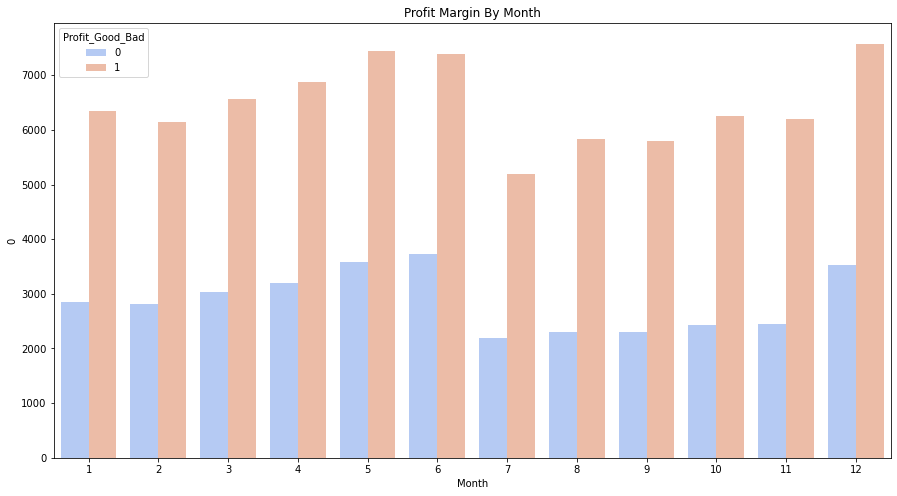

In [35]:
profitmargin_by_month= data.groupby(['Month','Profit_Good_Bad']).size().reset_index()
sns.barplot(data = profitmargin_by_month, x='Month',y=0, hue='Profit_Good_Bad', palette=('coolwarm')).set(title='Profit Margin By Month')
plt.gcf().set_size_inches(15,8)

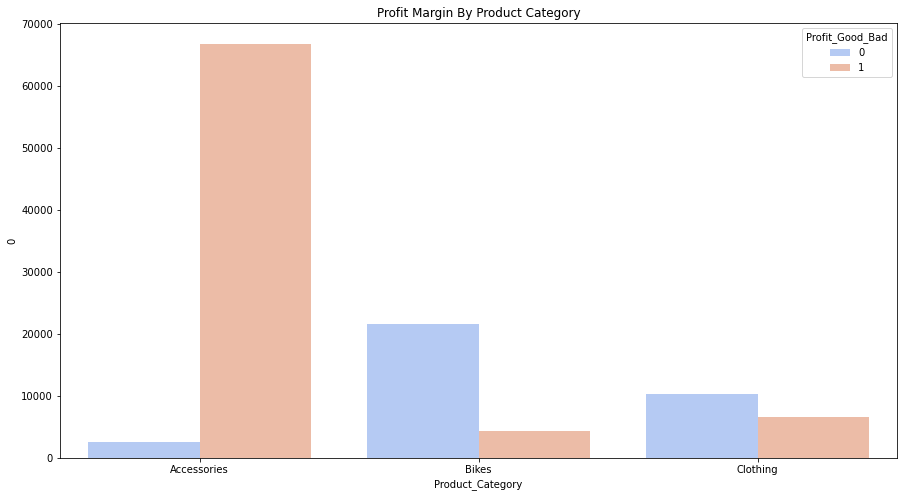

In [36]:
profitmargin_by_productcat= data.groupby(['Product_Category','Profit_Good_Bad']).size().reset_index()
sns.barplot(data = profitmargin_by_productcat, x='Product_Category',y=0, hue='Profit_Good_Bad', palette=('coolwarm')).set(title='Profit Margin By Product Category')
plt.gcf().set_size_inches(15,8)

In [37]:
X, y = data[['Country','Month','Age_Group', 'Product_Category']], data['Profit_Good_Bad']
X = pd.get_dummies(X, columns=['Country', 'Age_Group','Product_Category'], prefix=['Country', 'Age_Group', 'Product_Category'], drop_first=True)
X.head()

,Month,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age_Group_Seniors (64+),Age_Group_Young Adults (25-34),Age_Group_Youth (<25),Product_Category_Bikes,Product_Category_Clothing
0,11,1,0,0,0,0,0,0,1,0,0
1,11,1,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)


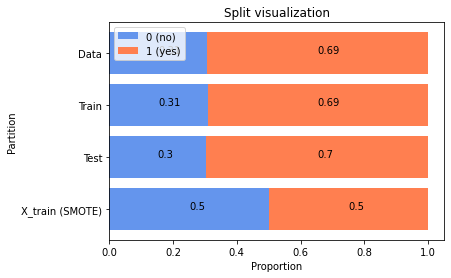

In [39]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='cornflowerblue', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='coral', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [40]:
lr_bal = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_sm, y_sm)
y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

Accuracy is:  88.02


Fontconfig error: Cannot load default config file



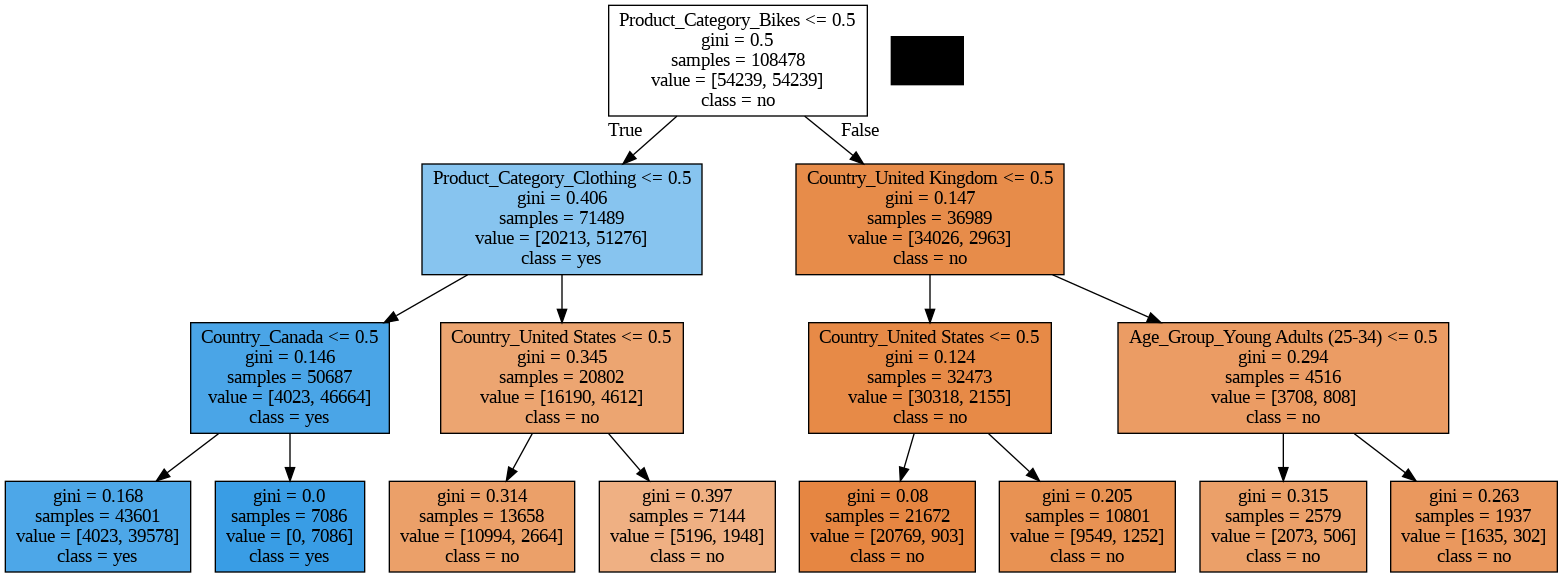

In [41]:
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_sm, y_sm)
y_pred = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_sm.columns, 
                                class_names=['no', 'yes'], filled=True) #or use y_train.unique()

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [42]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  88.02
